In [2]:
import DIY_library as t1
import math
import matplotlib.pyplot as plt
import numpy as np

1) Example problem for Importance Sampling

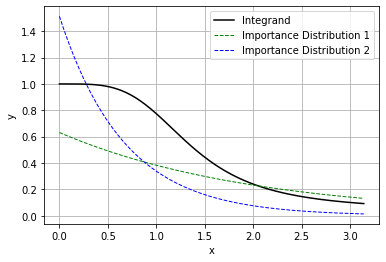

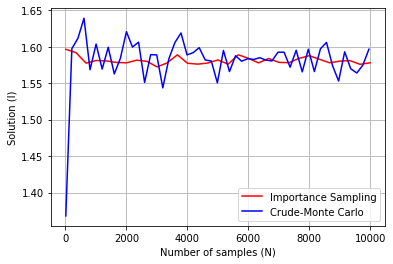

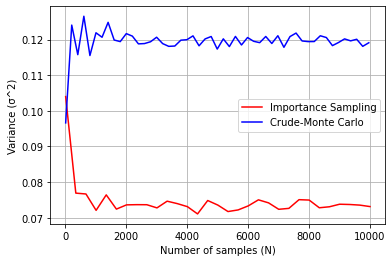

In [3]:
#Integrand function
def f1(x,L):
    return 1/(x**2 + np.cos(x)**2)

#Probability distribution function (pdf)
def f2(x,L):
    return L*np.exp(-L*x)/(1-np.exp(-np.pi*L)) 

#Commulative probability distribution function (cpdf)
def f3(x,L):
    return -(1/L)*np.log(1-(1-np.exp(-np.pi*L))*x)  

def f4(x,L):
    return 1

#Plotting the integrand alongside possible choices for importance distributions
t1.generic_plotter(0,np.pi,f1,f2,f2,0.5,1.5)

#Solving using importance sampling and storing results in respective lists
A,B,C=t1.solution_plotter(f1,f4,f2,0.8,f3,10000,0.1)

#Solving using crude_monte carlo method and storing results in respective lists
P,Q,R=t1.crude_montec_plotter(f1,0,np.pi,10000,0.1)

#Plotting solution comparison graphs
figure1=plt.figure()
plt.plot(A,B,color='red',label="Importance Sampling")
plt.plot(P,Q,color='blue',label="Crude-Monte Carlo")
plt.xlabel("Number of samples (N)")
plt.ylabel("Solution (I)")
plt.legend() 
plt.grid()
plt.show()

#Plotting variance comparison graphs
figure2=plt.figure()
plt.plot(A,C,color='red',label="Importance Sampling")
plt.plot(P,R,color='blue',label="Crude-Monte Carlo")
plt.xlabel("Number of samples (N)")
plt.ylabel("Variance (σ^2)")
plt.legend() 
plt.grid()
plt.show()

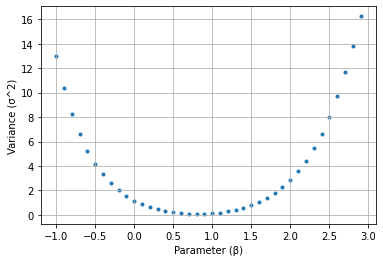

[1.5726851847787993, 0.07413655531080332]
[1.5940095271207348, 0.12168244181266175]


In [4]:
#Plotting the variance vs parameter graph for f1
t1.minimizer(-1,3,f1,f4,f2,f3,10000,0.1,0.1)

#Comparing the [solution,variance] list for the minimum variance parameter between importance sampling and crude-MC method 
#N = 10000
#Drawing samples from cpdf using inverse transpose sampling
x = t1.inverse_sampling(f3,10000,0.1,0.8) 
print(t1.importance_sampling(f1,f4,f2,x,0.8))

#Drawing samples from a uniform distribution
x = t1.LCG2(10000,0,np.pi,0.1)
print(t1.montec(f1,0,np.pi,10000,x))

2) Solving for Ground State Energy of One Dimensional Simple Harmonic Oscillator

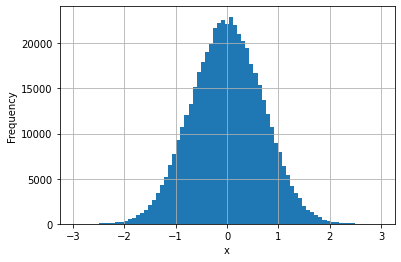

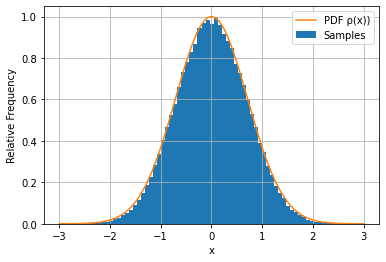

Ground state energy = 0.5 ℏω
Error = 0.0


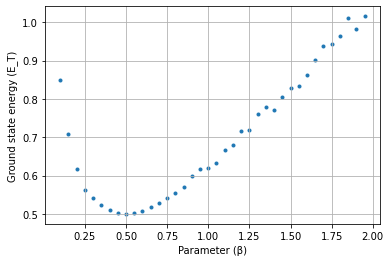

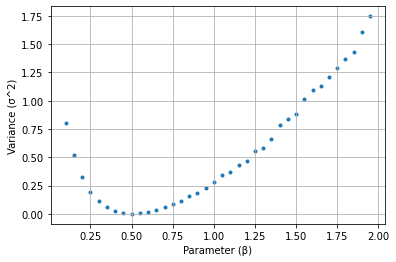

In [ ]:
#Trial Function
def px(x,L):
    return np.exp(-2*L*(x**2))

#Local Energy Function    
def Ex(x,L):
    return L+(0.5-2*(L**2))*(x**2)

#Drawing samples from px  
V,r = t1.metropolis_sampling(1000000,-3,3,px,0.5,0,4)

#Probability density function
def Px(x,L):
    return np.exp(-2*L*(x**2))/r

#Drawing samples from Px
V,r= t1.metropolis_sampling(1000000,-3,3,Px,0.5,0,4)

#Plotting the random sampling for any arbitrary parameter
t1.metropolis_sample_plotter(Px,V,-3,3,0.5,r)

#Plotting the solution and variance trend with parameter
t1.metropolis_solution_plotter(Ex,f4,Px,0.1,2,100000,-3,3,0,3.6) 

#Printing solution and error for the minimum variance wave function
A = t1.importance_sampling(Ex,f4,f4,V,0.5) #parameter = 0.5
print("Ground state energy =",A[0],"ℏω\nError =",math.sqrt(A[1]/len(V)))